In [32]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [27]:
#fiyat aralığı, yıl ve KM filtreleme
df = pd.read_csv("used_cars_data.csv", usecols=["listed_date","price","mileage","year","daysonmarket"],parse_dates=["listed_date"]) # alınacak kolonlar belirlenir.
df = df[(df["price"] >= 500) & (df["price"] <= 200000)]  #fiyat aralığı 500 ile 200.000 arasında 
df = df[(df["mileage"] >= 0) & (df["mileage"] <= 100000)] #KM 0 ile 100.000 arasında
df = df[(df["year"] >= 1990) & (df["year"] <= 2025)]# 1990 ve 2025 yılları arasında
df["month"] = df["listed_date"].dt.to_period("M")  # month çağırıldığında listed_date'deki ayı alır.

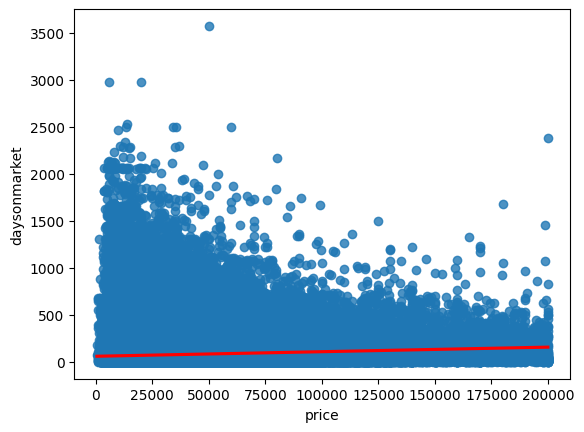

In [ ]:
# Fiyat (price) ile satış süresi (daysonmarket) arasındaki ilişkiyi regresyon çizgisiyle birlikte görselleştirir
sns.regplot(x="price", y="daysonmarket", data=df , line_kws={"color":"red"},)
plt.show()

C:\Users\ybayraktar\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


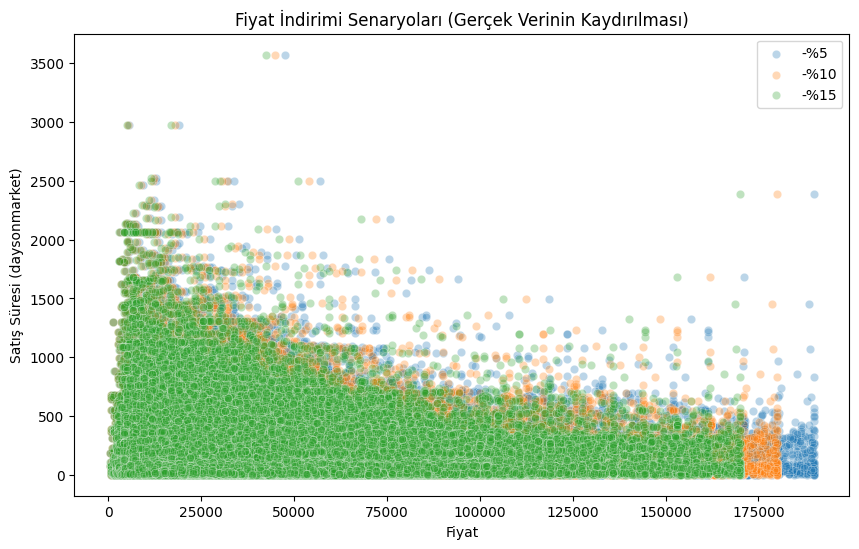

In [33]:
# İndirimli fiyat sütunları
df["price_-5"] = df["price"] * 0.95
df["price_-10"] = df["price"] * 0.90
df["price_-15"] = df["price"] * 0.85
 
 
plt.figure(figsize=(10,6))
# %5 indirim
sns.scatterplot(x="price_-5", y="daysonmarket", data=df, alpha=0.3, label="-%5")
 
# %10 indirim
sns.scatterplot(x="price_-10", y="daysonmarket", data=df, alpha=0.3, label="-%10")
 
# %15 indirim
sns.scatterplot(x="price_-15", y="daysonmarket", data=df, alpha=0.3, label="-%15")
 
plt.xlabel("Fiyat")
plt.ylabel("Satış Süresi (daysonmarket)")
plt.title("Fiyat İndirimi Senaryoları (Gerçek Verinin Kaydırılması)")
plt.legend()
plt.show()
 

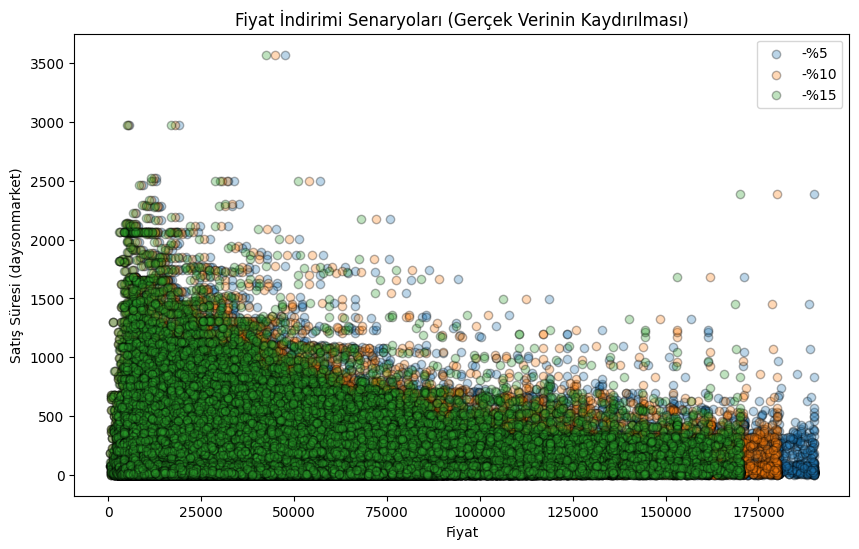

In [ ]:
# İndirimli fiyat sütunları
df["price_-5"] = df["price"] * 0.95
df["price_-10"] = df["price"] * 0.90
df["price_-15"] = df["price"] * 0.85
 
 
plt.figure(figsize=(10,6))
# %5 indirim
plt.scatter(x="price_-5", y="daysonmarket", data=df, alpha=0.3, label="-%5", edgecolors='black')
 
# %10 indirim
plt.scatter(x="price_-10", y="daysonmarket", data=df, alpha=0.3, label="-%10", edgecolors='black')
 
# %15 indirim
plt.scatter(x="price_-15", y="daysonmarket", data=df, alpha=0.3, label="-%15", edgecolors='black')
 
plt.xlabel("Fiyat")
plt.ylabel("Satış Süresi (daysonmarket)")
plt.title("Fiyat İndirimi Senaryoları (Gerçek Verinin Kaydırılması)")
plt.legend()
plt.show() 

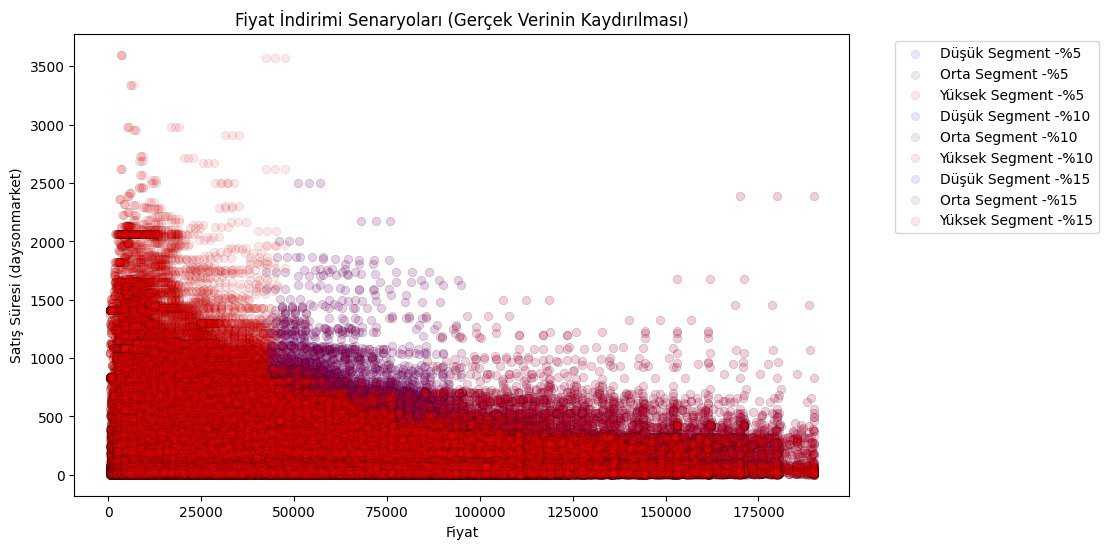

In [ ]:
df["daysonmarket"] = pd.to_numeric(df["daysonmarket"], errors="coerce")
df = df.dropna(subset=["daysonmarket"])
df = df[df["daysonmarket"] > 0]
# İndirimli fiyat sütunları
df["price_-5"] = df["price"] * 0.95
df["price_-10"] = df["price"] * 0.90
df["price_-15"] = df["price"] * 0.85

 
plt.figure(figsize=(10,6))

düşük_segment = df[(df["price"] >= 50000) & (df["price"] <= 100000)]     #km'si 20.000'den az olanları düşük_km olarak etiketlendirdik.
orta_segment = df[(df['price'] > 100000) & (df["price"] <= 250000)] 
yüksek_segment = df[df['price'] >= 250000  & (df["price"] <= 300000)]

sns.scatterplot( x="price_-5", y="daysonmarket", data=düşük_segment,color='blue', edgecolor="black", alpha=0.1, label="Düşük Segment -%5")

sns.scatterplot(x="price_-5", y="daysonmarket", data=orta_segment,color='purple', edgecolor="black", alpha=0.1, label="Orta Segment -%5")

sns.scatterplot(x="price_-5", y="daysonmarket", data=yüksek_segment,color='red', edgecolor="black", alpha=0.1, label="Yüksek Segment -%5")

sns.scatterplot( x="price_-10", y="daysonmarket", data=düşük_segment,color='blue', edgecolor="black", alpha=0.1, label="Düşük Segment -%10")

sns.scatterplot( x="price_-10", y="daysonmarket", data=orta_segment,color='purple', edgecolor="black", alpha=0.1, label="Orta Segment -%10")

sns.scatterplot(x="price_-10", y="daysonmarket", data=yüksek_segment,color='red', edgecolor="black", alpha=0.1, label="Yüksek Segment -%10")

sns.scatterplot(x="price_-15", y="daysonmarket", data=düşük_segment,color='blue', edgecolor="black", alpha=0.1, label="Düşük Segment -%15")

sns.scatterplot(x="price_-15", y="daysonmarket", data=orta_segment,color='purple', edgecolor="black", alpha=0.1, label="Orta Segment -%15")

sns.scatterplot(x="price_-15", y="daysonmarket", data=yüksek_segment,color='red', edgecolor="black",  alpha=0.1, label="Yüksek Segment -%15")

 
plt.xlabel("Fiyat")
plt.ylabel("Satış Süresi (daysonmarket)")
plt.title("Fiyat İndirimi Senaryoları (Gerçek Verinin Kaydırılması)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df[["daysonmarket"]]  # Bağımsız değişken
y = df["price"]      # Bağımlı değişken

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X, y)

# Tahmin
y_tahmin = model.predict(X)

# Modelin açıklayıcılık gücünü ölçmek için R-kare (R²) skoru hesaplanır
r2 = r2_score(y, y_tahmin)
print("R-kare (R²) skoru:", r2)

R-kare (R²) skoru: 0.004269487111076442


In [71]:
print(df["franchise_make"].unique())

['Jeep' 'Land Rover' 'FIAT' 'Chevrolet' 'Cadillac' 'Chrysler' 'Dodge'
 'RAM' nan 'Kia' 'Mazda' 'Audi' 'Hyundai' 'Ford' 'Toyota' 'Lincoln'
 'Volvo' 'GMC' 'Volkswagen' 'BMW' 'Lexus' 'Buick' 'Subaru' 'Scion' 'Honda'
 'Nissan' 'Acura' 'INFINITI' 'Porsche' 'Lamborghini' 'Bentley'
 'Rolls-Royce' 'Mercedes-Benz' 'Jaguar' 'Maserati' 'Alfa Romeo' 'Ferrari'
 'MINI' 'Mitsubishi' 'Aston Martin' 'Lotus' 'McLaren' 'Genesis' 'SRT'
 'smart' 'Rover' 'Shelby' 'Freightliner' 'Pagani']


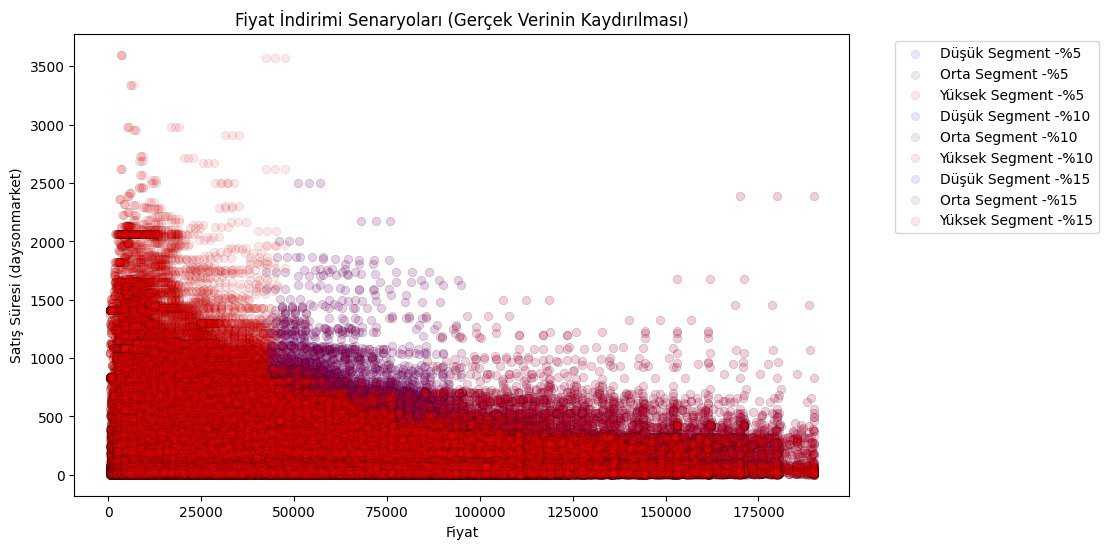

In [ ]:

# İndirimli fiyat sütunları
df["price_-5"] = df["price"] * 0.95
df["price_-10"] = df["price"] * 0.90
df["price_-15"] = df["price"] * 0.85

 
plt.figure(figsize=(10,6))

# Fiyat aralıklarına göre araçları segmentlere ayırıyoruz:

düşük_segment = df[(df["price"] >= 50000) & (df["price"] <= 100000)]     # Düşük segment: Fiyatı 50.000 ile 100.000 TL arasında olan araçlar
orta_segment = df[(df['price'] > 100000) & (df["price"] <= 250000)]      # Orta segment: Fiyatı 100.000 TL'den büyük ve 250.000 TL'ye kadar olan araçlar
yüksek_segment = df[df['price'] >= 250000  & (df["price"] <= 300000)]    # Yüksek segment: Fiyatı 250.000 TL ve üzeri, 300.000 TL'ye kadar olan araçlar

# Üç farklı fiyat segmentinde, çeşitli indirim senaryolarına göre fiyat ile satış süresi arasındaki ilişkiyi scatter plot ile görselleştiriyoruz.

sns.scatterplot( x="price_-5", y="daysonmarket", data=düşük_segment,color='blue', edgecolor="black", alpha=0.1, label="Düşük Segment -%5")

sns.scatterplot(x="price_-5", y="daysonmarket", data=orta_segment,color='purple', edgecolor="black", alpha=0.1, label="Orta Segment -%5")

sns.scatterplot(x="price_-5", y="daysonmarket", data=yüksek_segment,color='red', edgecolor="black", alpha=0.1, label="Yüksek Segment -%5")

sns.scatterplot( x="price_-10", y="daysonmarket", data=düşük_segment,color='blue', edgecolor="black", alpha=0.1, label="Düşük Segment -%10")

sns.scatterplot( x="price_-10", y="daysonmarket", data=orta_segment,color='purple', edgecolor="black", alpha=0.1, label="Orta Segment -%10")

sns.scatterplot(x="price_-10", y="daysonmarket", data=yüksek_segment,color='red', edgecolor="black", alpha=0.1, label="Yüksek Segment -%10")

sns.scatterplot(x="price_-15", y="daysonmarket", data=düşük_segment,color='blue', edgecolor="black", alpha=0.1, label="Düşük Segment -%15")

sns.scatterplot(x="price_-15", y="daysonmarket", data=orta_segment,color='purple', edgecolor="black", alpha=0.1, label="Orta Segment -%15")

sns.scatterplot(x="price_-15", y="daysonmarket", data=yüksek_segment,color='red', edgecolor="black",  alpha=0.1, label="Yüksek Segment -%15")

 
plt.xlabel("Fiyat")
plt.ylabel("Satış Süresi (daysonmarket)")
plt.title("Fiyat İndirimi Senaryoları (Gerçek Verinin Kaydırılması)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [48]:
#fiyat aralığı, yıl ve KM filtreleme
df = pd.read_csv("used_cars_data.csv", usecols=["listed_date","price","mileage","year","daysonmarket","franchise_make"],parse_dates=["listed_date"]) # alınacak kolonlar belirlenir.
df = df[(df["price"] >= 500) & (df["price"] <= 200000)]  #fiyat aralığı 500 ile 200.000 arasında 
df = df[(df["mileage"] >= 0) & (df["mileage"] <= 100000)] #KM 0 ile 100.000 arasında
df = df[(df["year"] >= 1990) & (df["year"] <= 2025)]# 1990 ve 2025 yılları arasında
df["month"] = df["listed_date"].dt.to_period("M")  # month çağırıldığında listed_date'deki ayı alır.

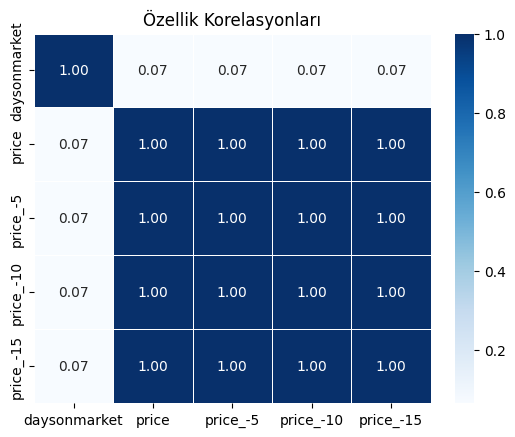

In [ ]:
# İndirimli fiyat sütunları
df["price_-5"] = df["price"] * 0.95
df["price_-10"] = df["price"] * 0.90
df["price_-15"] = df["price"] * 0.85

# Belirtilen sütunlar arasındaki Pearson korelasyon katsayılarını hesaplar ve ısı haritası (heatmap) olarak görselleştirir.
sns.heatmap(df[["daysonmarket","price","price_-5","price_-10", "price_-15"]].corr(method="pearson"), annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, linecolor='white')
plt.title("Özellik Korelasyonları")
plt.show()
 
 

C:\Users\ybayraktar\AppData\Local\Temp\ipykernel_34916\1627071031.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("used_cars_data.csv", usecols=["price","daysonmarket","franchise_make"],parse_dates=["daysonmarket"]) # alınacak kolonlar belirlenir.


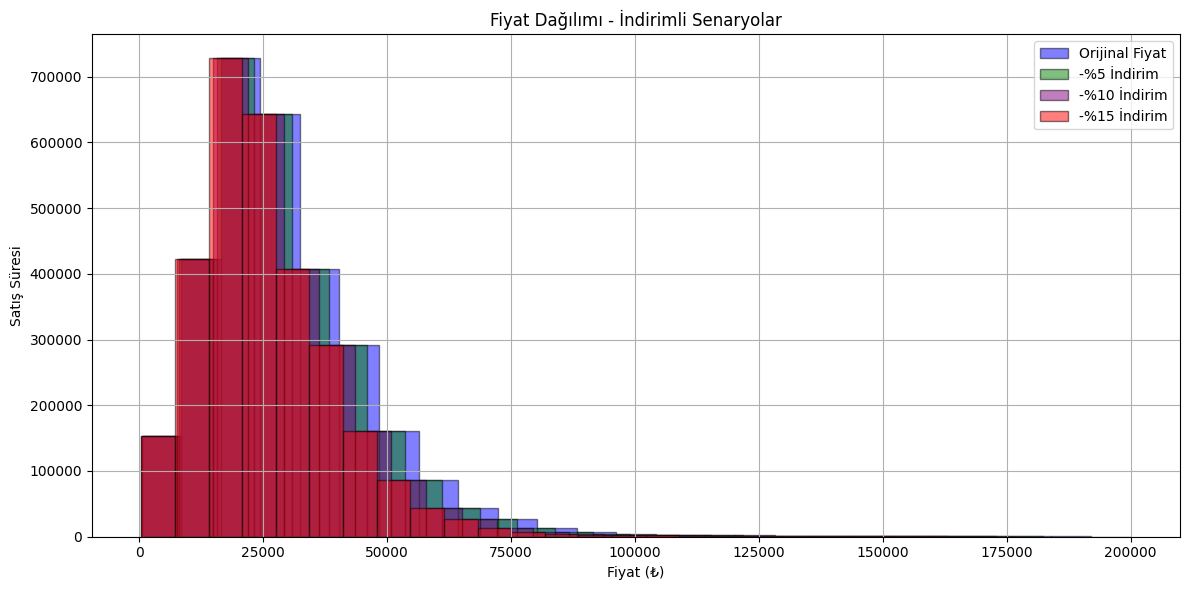

Fiyat Varyansı: 288181808.0750296 2
Fiyat Std Sapması: 16975.918475152666 2
-%5 Fiyat Varyansı: 260084081.78771424 2
-%10 Fiyat Varyansı: 233427264.540774 2
-%15 Fiyat Varyansı: 208211356.33420888 2


In [ ]:
#fiyat aralığı, yıl ve KM filtreleme
df = pd.read_csv("used_cars_data.csv", usecols=["price","daysonmarket","franchise_make"],parse_dates=["daysonmarket"]) # alınacak kolonlar belirlenir.
df = df[(df["price"] >= 500) & (df["price"] <= 200000)]  #fiyat aralığı 500 ile 200.000 arasında 
#KM 0 ile 100.000 arasında
# 1990 ve 2025 yılları arasında

# Orijinal fiyata %5, %10 ve %15 indirim uygulanmış yeni sütunlar oluştur
df["price_-5"] = df["price"] * 0.95
df["price_-10"] = df["price"] * 0.90
df["price_-15"] = df["price"] * 0.85
plt.figure(figsize=(12, 6))

# Farklı fiyat senaryolarının histogramlarını aynı grafikte göster
plt.hist(df["price"], bins=25, alpha=0.5, label="Orijinal Fiyat", color="blue", edgecolor="black")
plt.hist(df["price_-5"], bins=25, alpha=0.5, label="-%5 İndirim", color="green", edgecolor="black")
plt.hist(df["price_-10"], bins=25, alpha=0.5, label="-%10 İndirim", color="purple", edgecolor="black")
plt.hist(df["price_-15"], bins=25, alpha=0.5, label="-%15 İndirim", color="red", edgecolor="black")

plt.title("Fiyat Dağılımı - İndirimli Senaryolar")
plt.xlabel("Fiyat (₺)")
plt.ylabel("Satış Süresi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Orijinal ve indirimli fiyatların varyans ve standart sapma değerlerini hesapla ve yazdır
print("Fiyat Varyansı:", df["price"].var(), 2)
print("Fiyat Std Sapması:", df["price"].std(), 2)

print("-%5 Fiyat Varyansı:", df["price_-5"].var(), 2)
print("-%10 Fiyat Varyansı:", df["price_-10"].var(), 2)
print("-%15 Fiyat Varyansı:", df["price_-15"].var(), 2)